This is a toy example of the use of Ball Mapper. We will start by constructing a collection of points sampled from a unit circle.

This notebook was prepared by Davide Gurnari. 

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
%matplotlib inline

## Generate data

In [2]:
pointcloud = np.array([[np.cos(x), np.sin(x)] for x in np.arange(0, 6.3, 0.1)])
points_df = pd.DataFrame(pointcloud, columns=['x', 'y'])
points_df.head()

,x,y
0,1.000000,0.000000
1,0.995004,0.099833
2,0.980067,0.198669
3,0.955336,0.295520
4,0.921061,0.389418


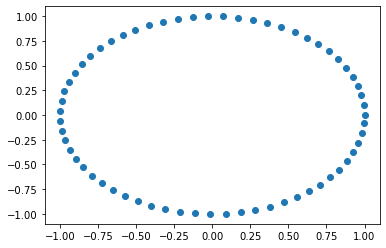

In [3]:
plt.scatter(points_df.x, points_df.y)

## Create BallMapper graph

In [4]:
from pyBallMapper import BallMapper

In [5]:
bm = BallMapper(points = points_df.values, # the pointcloud, as a numpy array
                coloring_df = points_df, # a dataframe with the coloring functions (in this case the pointcloud itself)
                epsilon = 0.25) # the radius of the balls

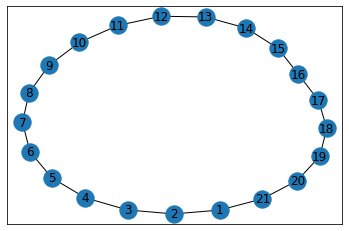

In [6]:
# bm.Graph is a networkx graph
nx.draw_networkx(bm.Graph, 
                 pos=nx.spring_layout(bm.Graph, seed=24))

In [7]:
# each ball stores the indices of the points inside it
print(bm.points_covered_by_landmarks[1])

[0, 1, 2, 61, 62]


## BM with reverse ordering

In [8]:
bm_reverse = BallMapper(points = points_df.values, # the pointcloud, as a numpy array
                        coloring_df = points_df, # a dataframe with the coloring functions (in this case the pointcloud itself)
                        epsilon = 0.25, # the radius of the balls
                        order=list(reversed(range(len(points_df.values)))) # reverse ordering
                       ) 

In [20]:
for idx in [1, 2]:
    print('BM')
    print('the landmark of cluster {} in BM is {}'.format(idx, bm.vertices[idx]))
    print('it covers the points {}'.format(bm.points_covered_by_landmarks[idx]))
    print()
    print('BM reversed')
    print('the landmark of cluster {} in BM reverse is {}'.format(idx, bm_reverse.vertices[idx]))
    print('it covers the points {}'.format(bm_reverse.points_covered_by_landmarks[idx]))
    print('\n\n')

BM
the landmark of cluster 1 in BM is 0
it covers the points [0, 1, 2, 61, 62]

BM reversed
the landmark of cluster 1 in BM reverse is 62
it covers the points [62, 61, 60, 1, 0]



BM
the landmark of cluster 2 in BM is 3
it covers the points [1, 2, 3, 4, 5]

BM reversed
the landmark of cluster 2 in BM reverse is 59
it covers the points [61, 60, 59, 58, 57]





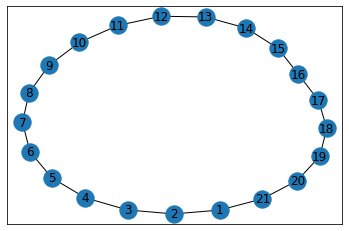

In [11]:
# bm.Graph is a networkx graph
nx.draw_networkx(bm_reverse.Graph, 
                 pos=nx.spring_layout(bm.Graph, seed=24))

## Colored Ball Mapper graph

In [12]:
from matplotlib.colors import ListedColormap
from matplotlib import cm

In [13]:
#Here we adopt standard colour palette
my_red_palette = cm.get_cmap(name='Reds')

In [14]:
# we can color the graph by any column in coloring_df
bm.color_by_variable('y', my_red_palette)

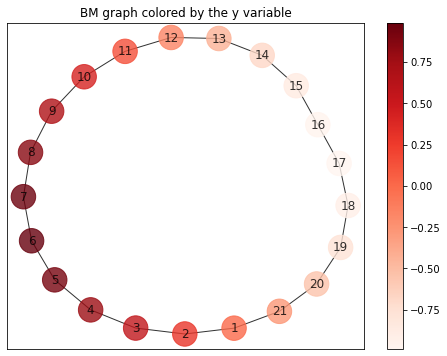

In [15]:
plt.figure(figsize= (8,6))
# plot the graph
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
# there is a lot we can customize
nx.draw_networkx(bm.Graph, 
                 pos=nx.spring_layout(bm.Graph, seed=24),
                 node_color = [bm.Graph.nodes[node]['color'] for node in bm.Graph.nodes],
                 node_size =  [bm.Graph.nodes[node]['size rescaled'] for node in bm.Graph.nodes],
                 alpha=0.8)

# plot a legend
sm = plt.cm.ScalarMappable(cmap = my_red_palette,
                           norm = plt.Normalize(vmin=bm.min_color_value, 
                                                vmax=bm.max_color_value))
plt.colorbar(sm)
plt.title('BM graph colored by the y variable')
plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Fancy visualizations using Bokeh
https://docs.bokeh.org/en/latest/docs/installation.html

In [16]:
from pyBallMapper_Bokeh import graph_GUI

In [17]:
from bokeh.plotting import figure, show

In [18]:
# create a GUI with input our BM graph, 
# a dataframe with coloring functions (one value per point in the pointcloud)
# and a color palette
# in this case we use the pointcloud as coloring function
my_fancy_gui = graph_GUI(bm.Graph, points_df, my_red_palette)
my_fancy_gui.color_by_variable('y')

color by variable y 
MIN_VALUE: -0.986, MAX_VALUE: 0.988


In [19]:
# creates an html file with the graph 
# and opens it in another tab
show(my_fancy_gui.plot)